# Coronavirus

* Coronavirus proviene de una enfermedad animal llamada **Zoonosis**. Se transmite entre animales y personas)
* Los sintomas son: fiebre, tos, problemas respiratorios.
* En casos graves, puede causar neumonía, síndrome respiratorios agudos, fallo de los riñones e includo la muerte.

* **Novel Coronavirus (nCoV)** es una nueva cepa que no había sido identificada en humanos anteriormente.

* Causas: **SARS-COV-2** corona virus.  
* Identificado inicialmente en: **Wuhan, Hubei, China**.  
* Los primeros sintomas fueron informados en: **1 Diciember 2019**. 
* Los primeros casos están ligados al contacto con el Mercado de Pescado y Marisco de Huanan. China, en el que se vendían animales vivos.
* El 30 de Enero de 2020 la OMS declaró el brote the Emergencia Pública Internacional.








## Import Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import datetime
from statistics import mean 
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
from fbprophet import Prophet
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)






Bad key "text.kerning_factor" on line 4 in
/home/emi/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Import the data (make sure you update this on a daily basis)

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

# Singapore data

In [68]:
# Singapore dataframes
singapore_confirmed_df = confirmed_df[confirmed_df['Country/Region']=='Singapore']
singapore_deaths_df = deaths_df[deaths_df['Country/Region']=='Singapore']
singapore_recoveries_df = recoveries_df[recoveries_df['Country/Region']=='Singapore']

In [69]:
# Group Singapore by Country/Region 
singapore_group_confirmed_df = singapore_confirmed_df.groupby('Country/Region').sum()
singapore_group_recoveries_df = singapore_recoveries_df.groupby('Country/Region').sum()
singapore_group_deaths_df = singapore_deaths_df.groupby('Country/Region').sum()


In [70]:
# Get columns with number of cases
singapore_confirmed = singapore_group_confirmed_df.loc[:, cols[4]:cols[-1]]
singapore_deaths = singapore_group_recoveries_df.loc[:, cols[4]:cols[-1]]
singapore_recoveries = singapore_group_deaths_df.loc[:, cols[4]:cols[-1]]

In [71]:
# Transpose data
singapore_confirm_trans = singapore_confirmed.transpose()
singapore_recoveries_trans = singapore_recoveries.transpose()
singapore_deaths_trans = singapore_deaths.transpose()

In [73]:
singapore_confirm_trans.tail()

Country/Region,Singapore
3/16/20,243
3/17/20,266
3/18/20,313
3/19/20,345
3/20/20,385


# China data

In [19]:
# China dataframes
china_confirmed_df = confirmed_df[confirmed_df['Country/Region']=='China']
china_deaths_df = deaths_df[deaths_df['Country/Region']=='China']
china_recoveries_df = recoveries_df[recoveries_df['Country/Region']=='China']

In [23]:
# Group China by Country/Region 
china_group_confirmed_df = china_confirmed_df.groupby('Country/Region').sum()
china_group_recoveries_df = china_recoveries_df.groupby('Country/Region').sum()
china_group_deaths_df = china_deaths_df.groupby('Country/Region').sum()


In [25]:
# Get columns with number of cases
china_confirmed = china_group_confirmed_df.loc[:, cols[4]:cols[-1]]
china_deaths = china_group_recoveries_df.loc[:, cols[4]:cols[-1]]
china_recoveries = china_group_deaths_df.loc[:, cols[4]:cols[-1]]

In [28]:
# Transpose data
china_confirm_trans = china_confirmed.transpose()
china_recoveries_trans = china_recoveries.transpose()
china_deaths_trans = china_deaths.transpose()

In [29]:
china_confirm_trans.head()

Country/Region,China
1/22/20,548
1/23/20,643
1/24/20,920
1/25/20,1406
1/26/20,2075


# Spain data

In [30]:
spain_confirmed_df = confirmed_df[confirmed_df['Country/Region']=='Spain']
spain_deaths_df = deaths_df[deaths_df['Country/Region']=='Spain']
recoveries_df = recoveries_df[recoveries_df['Country/Region']=='Spain']

In [31]:
cols = spain_confirmed_df.keys()

Get all the dates for the outbreak

In [32]:
confirmed = spain_confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = spain_deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [33]:
# Transpose data
confirm_trans = confirmed.transpose()
recoveries_trans = recoveries.transpose()
deaths_trans = deaths.transpose()

In [34]:
# Rename column
old_names = [18] 
new_names = ['y']
confirm_trans.rename(columns=dict(zip(old_names, new_names)), inplace=True)
recoveries_trans.rename(columns=dict(zip(old_names, new_names)), inplace=True)
deaths_trans.rename(columns=dict(zip(old_names, new_names)), inplace=True)

## Filtering data

The first significant date with data is '3/1/20', so let

In [35]:
first_day = '3/1/20'
last_day = confirm_trans.index[-1]
print(first_day, last_day)
# Confirmed cases
confirm_trans_filter = confirm_trans.loc[first_day:last_day]

# Recovered cases
recoveries_trans_filter = recoveries_trans.loc[first_day:last_day]

# Death cases
deaths_trans_filter = deaths_trans.loc[first_day:last_day]

# Counting days
n_days = confirm_trans_filter.count()

3/1/20 3/20/20


### Ratio recovered/confirmed cases

In [36]:
rc = recoveries_trans_filter['y'].iloc[-1]/confirm_trans_filter['y'].iloc[-1]*100
print('Ratio recuperados/casos confirmados:', rc, '%')

Ratio recuperados/casos confirmados: 7.780499755022048 %


### Ratio deaths/confirmed cases

In [37]:
rd = deaths_trans_filter['y'].iloc[-1]/confirm_trans_filter['y'].iloc[-1]*100
print('Ratio muertes/casos confirmados:', rd, '%')

Ratio muertes/casos confirmados: 5.110240078392945 %


### Plot cases in Spain

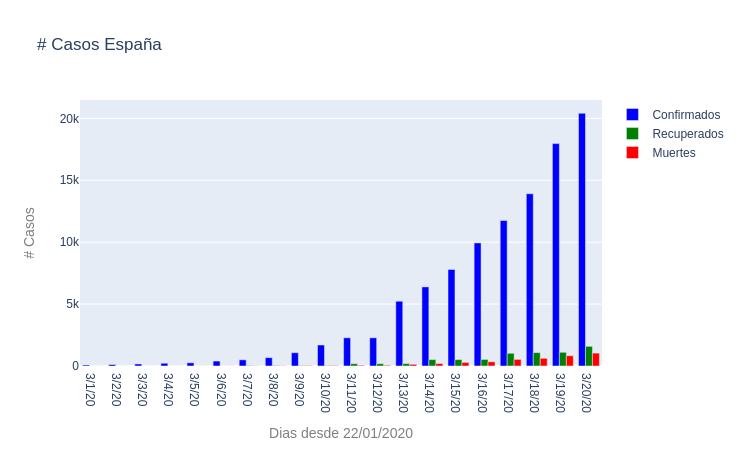

In [14]:
#data 
x = confirm_trans_filter.index
y = confirm_trans_filter['y']


# line confirmed
trace = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='blue'
    ),
    name="Confirmados"
)

# line recovered
# data 
x = recoveries_trans_filter.index
y = recoveries_trans_filter['y']

trace1 = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='green'
    ),
    name="Recuperados"
)

# data 
x = deaths_trans_filter.index
y = deaths_trans_filter['y']

trace2 = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='red'
    ),
    name="Muertes"
)

# layout
layout = go.Layout(title = "# Casos España",
                   xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace, trace1, trace2], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

## China/Singapore/Spain comparative

In [74]:
x = range(0, int(confirm_trans_filter.count()))
days = []
for n in x:
    days.append(n)
print(days)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


/home/emi/miniconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




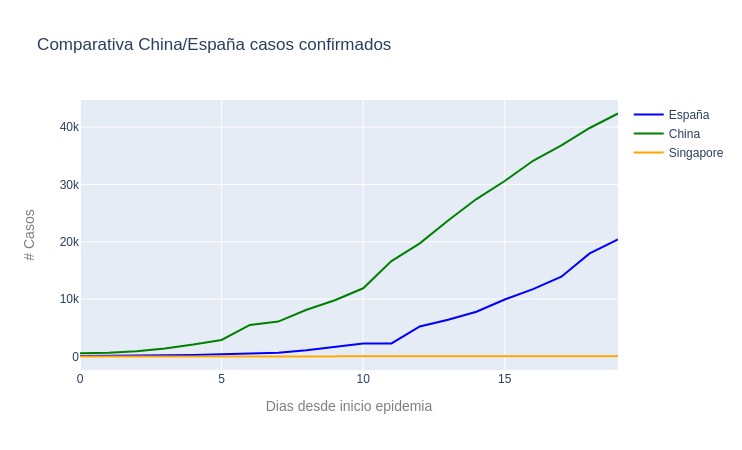

In [75]:
#data 
x = days
y = confirm_trans_filter['y']


# Spain confirmed lines
trace = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='blue'
    ),
    name="España"
)

# China confirmed line
# data 
x = days
y = china_confirm_trans['China']

trace1 = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='green'
    ),
    name="China"
)


# Singapore confirmed line
# data 
x = days
y = singapore_confirm_trans['Singapore']

trace2 = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='orange'
    ),
    name="Singapore"
)

# layout
layout = go.Layout(title = "Comparativa China/España casos confirmados",
                   xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde inicio epidemia', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace, trace1, trace2], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

### Confirmed cases logarithmic scale

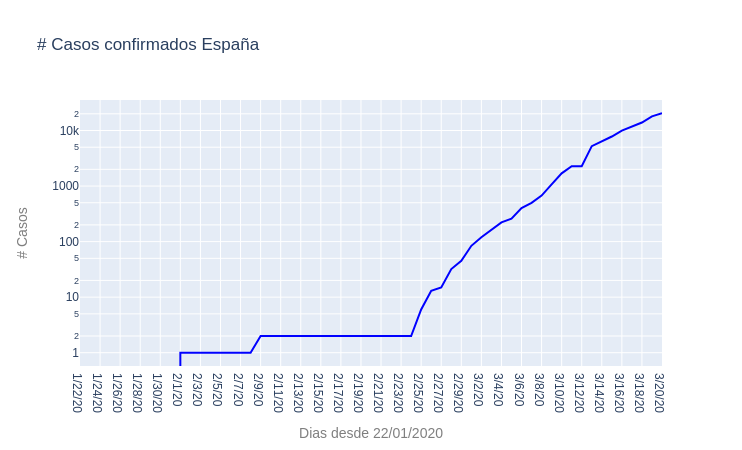

In [76]:
#data 
x = confirm_trans.index
y = confirm_trans['y']


# line confirmed
trace = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='blue'
    ),
    name="Confirmados"
)



# layout
layout = go.Layout(title = "# Casos confirmados España",
                   xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(yaxis_type="log")
iplot(fig)

### Plot recovered cases in Spain

In [ ]:
#data 
x = recoveries_trans.index
y = recoveries_trans['y']


# line
trace = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='green'
    ),
)


# layout
layout = go.Layout(title = "# Casos recuperados España",
    xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Plot Death cases in Spain

In [ ]:
#data 
x = deaths_trans.index
y = deaths_trans['y']


# line
trace = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='red'
    ),
)


# layout
layout = go.Layout(title = "# Muertes España",
    xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Plot Recovered and deaths

In [ ]:
#data 
x = ("Recup.", "Muertos")
y = (rc, rd)

#Colors
colors = ['green',] * 5
colors[1] = 'crimson'

# line
trace = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color=colors
    ),
)


# layout
layout = go.Layout(
    yaxis=dict(title = go.layout.yaxis.Title(text='Porcentage %', 
                                             font=dict(size=14, 
                                             color='#7f7f7f')))
)

# Plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Exponential Growth

In [ ]:
# Create column of difference between Nd and Nd-1
confirm_trans['changes'] = confirm_trans.y - confirm_trans.y.shift(1)
confirm_trans.tail()

In [ ]:
# Create column of difference between Nd changes and Nd-1 changes
confirm_trans['Growth Factor'] = confirm_trans.changes / confirm_trans.changes.shift(1)
confirm_trans.tail()



In [ ]:
# Clean inf data
confirm_trans['Growth Factor'] = confirm_trans['Growth Factor'].replace(np.inf, 0)

### Plot Growth Factor

In [ ]:
#data 
x = confirm_trans.index
y = confirm_trans['Growth Factor']
#mean = mean(y)

# line
trace = go.Line(
    x=x,
    y=y,
)


# layout
layout = go.Layout(title = "Factor Crecimiento Nuevos Casos España",
    xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='Crecimiento', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

In [ ]:
#Create a 100-day series

x2 = []
x = confirm_trans.index.values

for num in range(1,100):
#Get the last date 
    datetime_object = datetime.datetime.strptime(x[-1], '%m/%d/%y') + datetime.timedelta(days=1)
    #Time to string
    d = datetime_object.strftime("%m/%d/%y")
    print(d)

    #Add it to new array
    x2.append(d)

    #Concatenate both arrays
    x = np.concatenate((x, x2))


## Forecasting


## Transform time series data into a supervised learning problem


In [ ]:

df = confirm_trans
df['y+1'] = df['y'].shift(-1)

## One-Step Univariate Forecasting

It is standard practice in time series forecasting to use lagged observations (e.g. t-1) as input variables to forecast the current time step (t).

This is called one-step forecasting.


In [ ]:
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
 
values = df['y'].tolist()
data = series_to_supervised(values)
print(data)

## Persistence Forecast Model
It is important to establish a baseline forecast.

The simplest forecast you can make is to use the current observation (t) to predict the observation at the next time step (t+1).

This is called the naive forecast or the persistence forecast and may be the best possible model on some time series forecast problems.

In [ ]:
# persistence model
def model_persistence(x):
    return x


In [ ]:
# split into train and test sets
X = df.values

train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

### Make and Evaluate Forecast

In [ ]:
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

In [ ]:
#Plot predictions

In [ ]:
# plot predictions and expected results
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

## Autoregressive Forecast Model

Autoregression means developing a linear model that uses observations at previous time steps to predict observations at future time step.

We could calculate the linear regression model manually using the LinearRegession class in scikit-learn and manually specify the lag input variables to use.

Alternately, the statsmodels library provides an autoregression model that automatically selects an appropriate lag value using statistical tests and trains a linear regression model. It is provided in the AR class.

We can use this model by first creating the model AR() and then calling fit() to train it on our dataset. This returns an ARResult object.

Once fit, we can use the model to make a prediction by calling the predict() function for a number of observations in the future. This creates 1 7-day forecast, which is different from the persistence example above.

In [ ]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)
from statsmodels.tsa.ar_model import AR
# split into train and test sets
X = confirm_trans['y']


In [ ]:
dataset = X
model = AR(dataset)
model_fit = model.fit()

In [ ]:
prediction = model_fit.predict(start=len(dataset), end=len(dataset))
print(prediction)


In [ ]:
values = confirm_trans['y']
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

In [ ]:
from pandas.plotting import autocorrelation_plot
series = confirm_trans['y'].values
autocorrelation_plot(series)
plt.show()

In [ ]:
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

## ARIMA Model for Time Series Forecasting 

In [ ]:
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

series = confirm_trans['y'].values
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

## Rolling Forecast ARIMA Model

In [ ]:
X = confirm_trans['y'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()